In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load dataset
file_path = "data.csv"
df = pd.read_csv(file_path, encoding="latin1")

# Data Cleaning
# Convert funding_total_usd to numeric after removing non-numeric characters
df["funding_total_usd"] = df[" funding_total_usd"].replace('[\$,]', '', regex=True).astype(float)

# Grouping data by category
df_category = df.groupby("category_list")["funding_total_usd"].sum().reset_index()
df_category = df_category.sort_values(by="funding_total_usd", ascending=False).head(10)

# Bar Chart: Total Funding across Startup Categories
plt.figure(figsize=(12, 6))
sns.barplot(x="funding_total_usd", y="category_list", data=df_category, palette="Blues_r")
plt.xlabel("Total Funding (in USD Millions)")
plt.ylabel("Startup Category")
plt.title("Total Funding across Top 10 Startup Categories in SF Bay Area")
plt.show()

# Geographical Heatmap Data Preparation
df_geo = df.groupby(["city", "state_code"])["funding_total_usd"].sum().reset_index()
df_geo = df_geo.dropna()

# Mapping Cities to Coordinates (For better accuracy, external geocoding can be used)
city_coords = {
    "San Francisco": (37.7749, -122.4194),
    "Palo Alto": (37.4419, -122.1430),
    "Mountain View": (37.3861, -122.0838),
    "San Jose": (37.3382, -121.8863),
    "Oakland": (37.8044, -122.2711)
}
df_geo["Latitude"] = df_geo["city"].map(lambda x: city_coords.get(x, (None, None))[0])
df_geo["Longitude"] = df_geo["city"].map(lambda x: city_coords.get(x, (None, None))[1])
df_geo = df_geo.dropna()

# Geographical Heatmap using Plotly
fig = px.scatter_mapbox(
    df_geo, lat="Latitude", lon="Longitude", size="funding_total_usd",
    hover_name="city", color="funding_total_usd",
    color_continuous_scale="Blues", zoom=9, mapbox_style="carto-positron"
)
fig.update_layout(title="Geographical Distribution of Startup Funding in SF Bay Area")
fig.show()

SyntaxError: invalid non-printable character U+00A0 (864834166.py, line 32)

In [3]:
import pandas as pd

# Load the CSV file
file_path = "data.csv"  # Update with your actual file path
df = pd.read_csv(file_path, encoding="ISO-8859-1")

# Display column names
print(df.columns)


Index(['name', 'homepage_url', 'category_list', ' market ',
       ' funding_total_usd ', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')


In [4]:
# Standardizing column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Display column names after standardization
print(df.columns)

Index(['name', 'homepage_url', 'category_list', 'market', 'funding_total_usd',
       'status', 'country_code', 'state_code', 'region', 'city',
       'funding_rounds', 'founded_at', 'founded_month', 'founded_quarter',
       'founded_year', 'first_funding_at', 'last_funding_at', 'seed',
       'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note',
       'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
       'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_a',
       'round_b', 'round_c', 'round_d', 'round_e', 'round_f', 'round_g',
       'round_h'],
      dtype='object')


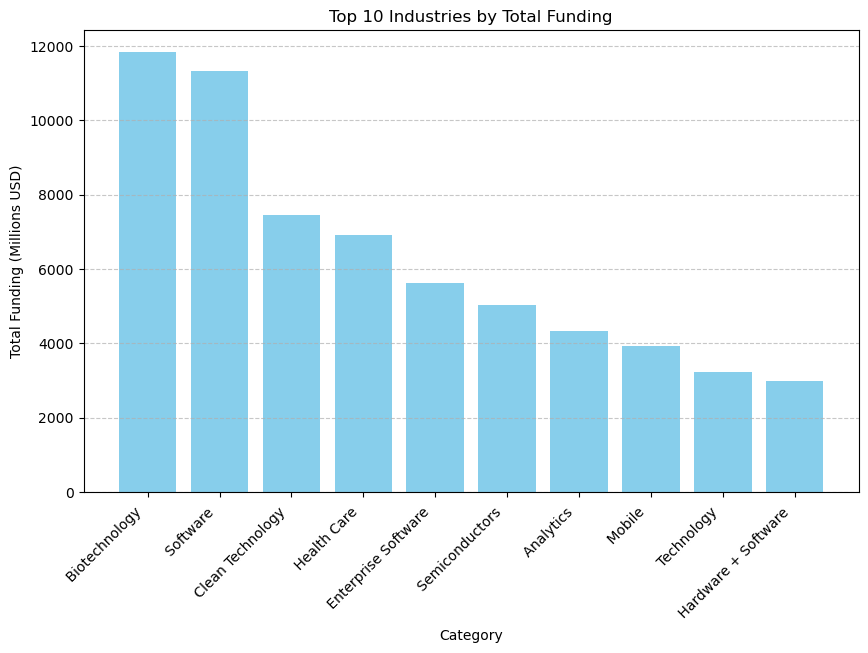

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file (update the path as needed)
file_path = "data.csv"  # Change this to the correct file path
df = pd.read_csv(file_path, encoding="ISO-8859-1")

# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Selecting relevant columns
category_column = "market"  # Update if different
funding_column = "funding_total_usd"  # Update if different

df_cleaned = df[[category_column, funding_column]].copy()
df_cleaned = df_cleaned.rename(columns={category_column: 'Category', funding_column: 'Total Funding (USD Millions)'})

# Cleaning the funding column
df_cleaned['Total Funding (USD Millions)'] = (
    df_cleaned['Total Funding (USD Millions)']
    .astype(str)  # Convert everything to string first
    .str.replace('[\$,]', '', regex=True)  # Remove currency symbols and commas
    .str.strip()  # Remove leading/trailing spaces
    .replace('-', '0')  # Replace dashes with zero
)

# Convert to float, handling errors
df_cleaned['Total Funding (USD Millions)'] = pd.to_numeric(df_cleaned['Total Funding (USD Millions)'], errors='coerce') / 1_000_000

# Drop rows where conversion failed (NaN values)
df_cleaned = df_cleaned.dropna()

# Grouping by Category to sum funding
df_final = df_cleaned.groupby('Category', as_index=False).sum()

# Selecting the top 10 industries by total funding
df_top10 = df_final.nlargest(10, 'Total Funding (USD Millions)')

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(df_top10['Category'], df_top10['Total Funding (USD Millions)'], color='skyblue')
plt.xlabel("Category")
plt.ylabel("Total Funding (Millions USD)")
plt.title("Top 10 Industries by Total Funding")
plt.xticks(rotation=45, ha='right')  # Rotate category labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [13]:
import pandas as pd
import altair as alt

# Load the dataset
file_path = "data.csv"
df = pd.read_csv(file_path, encoding="ISO-8859-1")

# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Selecting relevant columns
category_column = "market"
funding_column = "funding_total_usd"

df_cleaned = df[[category_column, funding_column]].copy()
df_cleaned = df_cleaned.rename(columns={category_column: 'Category', funding_column: 'Total Funding (USD Millions)'})

# Cleaning the funding column
df_cleaned['Total Funding (USD Millions)'] = (
    df_cleaned['Total Funding (USD Millions)']
    .astype(str)  
    .str.replace('[\$,]', '', regex=True)  
    .str.strip()  
    .replace('-', '0')  
)

# Convert to float and scale to millions
df_cleaned['Total Funding (USD Millions)'] = pd.to_numeric(df_cleaned['Total Funding (USD Millions)'], errors='coerce') / 1_000_000

# Drop NaN values
df_cleaned = df_cleaned.dropna()

# Group by category to sum funding
df_final = df_cleaned.groupby('Category', as_index=False).sum()

# Select top 10 industries by total funding
df_top10 = df_final.nlargest(30, 'Total Funding (USD Millions)')

# Altair interactive selection (using selection_point for Altair 5.0+)
selection = alt.selection_point(fields=['Category'], bind='legend')

# Create the interactive bar chart
chart = alt.Chart(df_top10).mark_bar().encode(
    x=alt.X('Category:N', sort='-y', title="Industry"),
    y=alt.Y('Total Funding (USD Millions):Q', title="Total Funding (Millions USD)"),
    color=alt.Color('Category:N', legend=alt.Legend(title="Industry")),
    tooltip=['Category', 'Total Funding (USD Millions)']
).add_params(  # Updated from add_selection to add_params
    selection
).properties(
    width=700,
    height=400,
    title="Top 10 Industries by Total Funding (Interactive)"
)

chart


alt.Chart(...)

In [11]:
import pandas as pd
import plotly.graph_objects as go

# Load the dataset
file_path = "data.csv"
df = pd.read_csv(file_path, encoding="ISO-8859-1")

# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Selecting relevant columns (Market and Funding Sources)
market_column = "market"
funding_sources = [
    "seed", "venture", "equity_crowdfunding", "undisclosed", "convertible_note",
    "debt_financing", "angel", "grant", "private_equity", "post_ipo_equity",
    "post_ipo_debt", "secondary_market", "product_crowdfunding"
]

# Melt dataset to create source-target pairs
df_melted = df.melt(id_vars=[market_column], value_vars=funding_sources, var_name="Funding Source", value_name="Amount")
df_melted = df_melted.dropna().query("Amount > 0")  # Remove missing or zero funding rows

# Group and sum funding amounts
df_sankey = df_melted.groupby([market_column, "Funding Source"]).sum().reset_index()

# Remove small funding connections (set threshold to 5% of max funding to declutter)
threshold = df_sankey["Amount"].max() * 0.05  # Adjust this percentage if needed
df_sankey = df_sankey[df_sankey["Amount"] >= threshold]

# Create nodes list (unique Market and Funding Sources)
nodes = list(set(df_sankey[market_column].unique()).union(set(df_sankey["Funding Source"].unique())))
node_mapping = {node: i for i, node in enumerate(nodes)}

# Map source and target to node indices
df_sankey["source_id"] = df_sankey[market_column].map(node_mapping)
df_sankey["target_id"] = df_sankey["Funding Source"].map(node_mapping)

# Generate colors dynamically for better differentiation
colors = [
    "rgba(31, 119, 180, 0.6)", "rgba(255, 127, 14, 0.6)", "rgba(44, 160, 44, 0.6)",
    "rgba(214, 39, 40, 0.6)", "rgba(148, 103, 189, 0.6)", "rgba(140, 86, 75, 0.6)"
]
link_colors = [colors[i % len(colors)] for i in range(len(df_sankey))]

# Create Sankey diagram with improved readability
fig = go.Figure(go.Sankey(
    node=dict(
        pad=30,  # Increased padding for better separation
        thickness=30,  # Increased thickness for better visibility
        line=dict(color="black", width=0.8),
        label=nodes,
        color="rgba(0, 0, 0, 0.1)"  # Lighter color for nodes to improve contrast
    ),
    link=dict(
        source=df_sankey["source_id"],
        target=df_sankey["target_id"],
        value=df_sankey["Amount"],
        color=link_colors  # Apply dynamic colors for better distinction
    )
))

fig.update_layout(
    title_text="Sankey Diagram: Market vs. Funding Sources",
    font_size=12,
    margin=dict(t=100, b=100, l=100, r=100),  # Adjusted margins to give more space
    height=800  # Increased height to prevent overlap of nodes and links
)

fig.show()

#funding rounds

In [39]:
import pandas as pd
import plotly.graph_objects as go

# Load the dataset
file_path = "data.csv"
df = pd.read_csv(file_path, encoding="ISO-8859-1")

# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Selecting relevant columns
funding_rounds_col = "funding_rounds"
funding_sources = [
    "seed", "venture", "equity_crowdfunding", "undisclosed", "convertible_note",
    "debt_financing", "angel", "grant", "private_equity", "post_ipo_equity",
    "post_ipo_debt", "secondary_market", "product_crowdfunding"
]

# Bucket funding rounds into categories
df["Funding Round Group"] = pd.cut(df[funding_rounds_col], 
                                   bins=[0, 3, 6, float("inf")], 
                                   labels=["1-3 Rounds", "4-6 Rounds", "7+ Rounds"])

# Melt dataset to create source-target pairs
df_melted = df.melt(id_vars=["Funding Round Group"], value_vars=funding_sources, 
                     var_name="Funding Source", value_name="Amount")
df_melted = df_melted.dropna().query("Amount > 0")  # Remove missing or zero funding rows

# Group and sum funding amounts
df_sankey = df_melted.groupby(["Funding Round Group", "Funding Source"]).sum().reset_index()

# Create nodes list (Funding Rounds and Funding Sources)
nodes = list(df_sankey["Funding Round Group"].unique()) + list(df_sankey["Funding Source"].unique())
node_mapping = {node: i for i, node in enumerate(nodes)}

# Map source and target to node indices
df_sankey["source_id"] = df_sankey["Funding Round Group"].map(node_mapping)
df_sankey["target_id"] = df_sankey["Funding Source"].map(node_mapping)

# Generate colors dynamically for better differentiation
colors = [
    "rgba(31, 119, 180, 0.6)", "rgba(255, 127, 14, 0.6)", "rgba(44, 160, 44, 0.6)",
    "rgba(214, 39, 40, 0.6)", "rgba(148, 103, 189, 0.6)", "rgba(140, 86, 75, 0.6)"
]
link_colors = [colors[i % len(colors)] for i in range(len(df_sankey))]

# Create Sankey diagram
fig = go.Figure(go.Sankey(
    node=dict(
        pad=30,  # Increased padding for better separation
        thickness=30,  # Increased thickness for better visibility
        line=dict(color="black", width=0.8),
        label=nodes,
        color="rgba(0, 0, 0, 0.1)"  # Lighter color for nodes to improve contrast
    ),
    link=dict(
        source=df_sankey["source_id"],
        target=df_sankey["target_id"],
        value=df_sankey["Amount"],
        color=link_colors  # Apply dynamic colors for better distinction
    )
))

fig.update_layout(
    title_text="Sankey Diagram: Funding Rounds → Funding Sources",
    font_size=12,
    margin=dict(t=100, b=100, l=100, r=100),  # Adjusted margins to give more space
    height=700  # Adjusted height
)

fig.show()
fig.write_html("sankey_diagram.html")



In [26]:
import pandas as pd
import altair as alt

# Load the dataset
file_path = "data.csv"
df = pd.read_csv(file_path, encoding="ISO-8859-1")

# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Convert funding rounds columns to numeric
funding_rounds = [
    "seed", "round_a", "round_b", "round_c", "round_d", 
    "round_e", "round_f", "round_g", "round_h"
]
df[funding_rounds] = df[funding_rounds].apply(pd.to_numeric, errors="coerce").fillna(0)

# Melt data for visualization
df_melted = df.melt(id_vars=["market"], value_vars=funding_rounds, 
                     var_name="Funding Round", value_name="Total Funding")

# Aggregate total funding by market and funding round
df_grouped = df_melted.groupby(["market", "Funding Round"], as_index=False).sum()

# Select top markets
top_markets = df_grouped.groupby("market")["Total Funding"].sum().nlargest(30).index
df_top = df_grouped[df_grouped["market"].isin(top_markets)]

# Create stacked bar chart
chart = alt.Chart(df_top).mark_bar().encode(
    x=alt.X("market:N", title="Market", sort="-y"),
    y=alt.Y("Total Funding:Q", title="Total Funding (USD)"),
    color=alt.Color("Funding Round:N", title="Funding Round"),
    tooltip=["market", "Funding Round", "Total Funding"]
).properties(
    width=800,
    height=400,
    title="Funding Rounds by Market (Stacked Bar Chart)"
)

chart.show()


alt.Chart(...)

In [36]:
import pandas as pd
import altair as alt

# Load the dataset
file_path = "data.csv"
df = pd.read_csv(file_path, encoding="ISO-8859-1")

# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Convert funding rounds columns to numeric
funding_rounds = [
    "seed", "round_a", "round_b", "round_c", "round_d", 
    "round_e", "round_f", "round_g", "round_h"
]
df[funding_rounds] = df[funding_rounds].apply(pd.to_numeric, errors="coerce").fillna(0)

# Melt data for visualization
df_melted = df.melt(id_vars=["market"], value_vars=funding_rounds, 
                     var_name="Funding Round", value_name="Total Funding")

# Aggregate total funding by market and funding round
df_grouped = df_melted.groupby(["market", "Funding Round"], as_index=False).sum()

# Select top markets
top_markets = df_grouped.groupby("market")["Total Funding"].sum().nlargest(30).index
df_top = df_grouped[df_grouped["market"].isin(top_markets)]

# Create a dropdown filter for funding rounds
funding_round_dropdown = alt.binding_select(options=["All"] + sorted(df_top["Funding Round"].unique()), name="Select Funding Round: ")
selection = alt.selection_single(name="Funding Round", bind=funding_round_dropdown, value="All", fields=["Funding Round"])

# Create stacked bar chart with funding round filter
chart = alt.Chart(df_top).mark_bar().encode(
    x=alt.X("market:N", title="Market", sort="-y"),
    y=alt.Y("Total Funding:Q", title="Total Funding (USD)"),
    color=alt.Color("Funding Round:N", title="Funding Round"),
    tooltip=["market", "Funding Round", "Total Funding"]
).add_selection(
    selection
).transform_filter(
    alt.datum["Funding Round"] == selection["Funding Round"] | (selection["Funding Round"] == "All")
).properties(
    width=800,
    height=400,
    title="Funding Rounds by Market (Stacked Bar Chart)"
)

# Show the chart
chart.show()


/var/folders/xv/xknc3l796yl7nn5mzjwr10qc0000gn/T/ipykernel_22455/3341443664.py:31: AltairDeprecationWarning:


Deprecated since `altair=5.0.0`. Use selection_point instead.

/var/folders/xv/xknc3l796yl7nn5mzjwr10qc0000gn/T/ipykernel_22455/3341443664.py:39: AltairDeprecationWarning:


Deprecated since `altair=5.0.0`. Use add_params instead.



alt.Chart(...)